In [530]:
# Paqueteria
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
import time
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import math

In [531]:
# Lectura de CSV
csv_horas_bus = "Data/horas_buses_peru.xlsx"
csv_horas_vuelo = "Data/tiempo_vuelo_lima.csv"


In [532]:
df_horas_bus = pd.read_excel(csv_horas_bus)
df_vuelo = pd.read_csv(csv_horas_vuelo)

In [533]:

df_horas_bus

,Departamento,Capital,Chachapoyas,Huaraz,Abancay,Arequipa,Ayacucho,Cajamarca,Cusco,Huancavelica,...,Lima,Puerto Maldonado,Moquegua,Cerro de Pasco,Piura,Puno,Moyobamba,Tacna,Tumbes,Pucallpa
0,Amazonas,Chachapoyas,0,19,37,38,31,9,41,29,...,21,50,39,22,10,43,21,21,16,21
1,Áncash,Huaraz,19,0,23,24,17,12,27,14,...,6,36,7,10,13,29,7,27,18,17
2,Apurímac,Abancay,37,23,0,13,8,30,5,12,...,15,14,15,18,31,11,15,18,36,27
3,Arequipa,Arequipa,38,24,13,0,18,31,9,18,...,16,13,3,20,32,5,16,5,37,32
4,Ayacucho,Ayacucho,31,17,8,17,0,24,12,5,...,9,21,9,10,25,18,9,19,30,19
5,Cajamarca,Cajamarca,9,12,30,31,24,0,34,22,...,15,43,33,18,9,37,14,34,13,27
6,Cusco,Cusco,41,27,5,9,12,34,0,17,...,20,9,11,22,36,7,20,13,40,29
7,Huancavelica,Huancavelica,29,14,12,18,5,22,17,0,...,7,26,19,8,24,23,7,21,28,17
8,Huánuco,Huánuco,19,8,20,23,13,20,25,9,...,8,35,7,3,20,29,7,26,25,8
9,Ica,Ica,26,11,11,12,7,19,15,6,...,4,25,13,10,20,17,26,15,25,20


In [534]:
department = df_horas_bus['Departamento'][1]
                               
department

'Áncash'

# HORAS VIA TERRESTE

In [535]:
from statistics import median
department_counts = {}
dis_horas_centro_min = 10
dis_horas_centro_inter = 15
dis_horas_centro_max = 30 
lst =[]

for i in range(0, 23):
    row_str = df_horas_bus.iloc[i]
 
    department = df_horas_bus['Departamento'][i]
    row_int = [int(str(item)) if isinstance(item, int) or (isinstance(item, str) and item.isdigit()) else item for item in row_str]
    row_int_filtered = row_int[2:]
    if row_int_filtered:
        min_value = __builtins__.min(row_int_filtered)
        max_value = __builtins__.max(row_int_filtered)
        sortedvalue = sorted(row_int_filtered)
        second_min_value = sortedvalue[1]
        filter_column = [num for num in row_int_filtered if num < 15]
        median_value = median (row_int_filtered)
        count_selection = median(filter_column)

        count_greater_than_min = sum(1 for item in row_int_filtered if  item < dis_horas_centro_min)
        count_greater_than_inter = sum(1 for item in row_int_filtered if item > dis_horas_centro_min and item <dis_horas_centro_inter)
        count_greater_than_max = sum(1 for item in row_int_filtered if item > dis_horas_centro_inter and item <dis_horas_centro_max)
        new_row = [min_value, second_min_value, max_value, median_value, count_greater_than_min,count_greater_than_inter,count_greater_than_max]
        department_counts[department] = [ median_value,min_value, max_value, count_greater_than_min,count_greater_than_inter,count_greater_than_max, second_min_value, count_selection]
        lst.append(new_row)
sorted_departments = sorted(department_counts.items(), key=lambda item: item[0], reverse=True)
department_data = []
for department, counts in sorted_departments:
    department_data.append({
        'Department': department,
        'Min Value': counts[1],
        'Second Min Value': counts[6],
        'Max Value': counts[2],
        'Median Value': counts[0],
        'Count < 10hrs': counts[3],
        'Count < 15hrs': counts[4],
        'Count < 30hrs': counts[5],
        'Mean <= 15hrs': counts[7]
    })
    
df = pd.DataFrame(department_data)
df_filter = df.sort_values(by = "Mean <= 15hrs")
df_filter

,Department,Min Value,Second Min Value,Max Value,Median Value,Count < 10hrs,Count < 15hrs,Count < 30hrs,Mean <= 15hrs
3,Tacna,0,2,39,21,4,1,12,5.0
5,Puno,0,4,43,23,5,1,9,6.0
20,Arequipa,0,3,38,18,5,3,10,7.0
8,Moquegua,0,2,39,17,7,3,6,7.0
10,Lima,0,4,29,15,9,1,9,7.0
12,La Libertad,0,3,38,13,8,4,9,7.0
13,Junín,0,3,28,18,8,3,12,7.0
16,Huancavelica,0,3,29,17,8,2,13,7.0
11,Lambayeque,0,3,42,18,6,2,8,8.0
2,Tumbes,0,5,49,25,3,2,9,8.0


In [536]:
longitude = df_lat_long['Longitude']
latitude = df_lat_long['Latitude']


Text(0, 0.5, 'Longitudes')

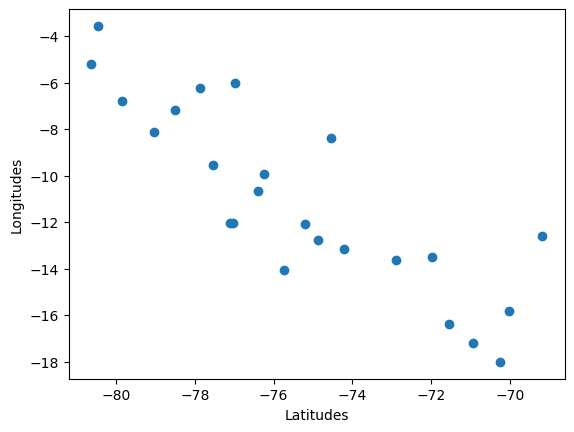

In [537]:
# Leo latidud y longitud
import matplotlib.pyplot as plt

longitude = df_lat_long['Longitude']
latitude = df_lat_long['Latitude']
plt.scatter(longitude,latitude)
plt.xlabel('Latitudes')
plt.ylabel('Longitudes')

In [538]:
from sklearn_extra.cluster import KMedoids
df_data_kmeans = pd.DataFrame()
 
df_data_kmeans['lat'] = df_lat_long['Latitude']
df_data_kmeans['long']= df_lat_long['Longitude']
km = KMedoids(n_clusters=3)
y_predicted = km.fit_predict(df_data_kmeans)
y_predicted

df_data_kmeans['c'] = y_predicted
df_data_kmeans['Departamento'] = df_lat_long['Department'] 

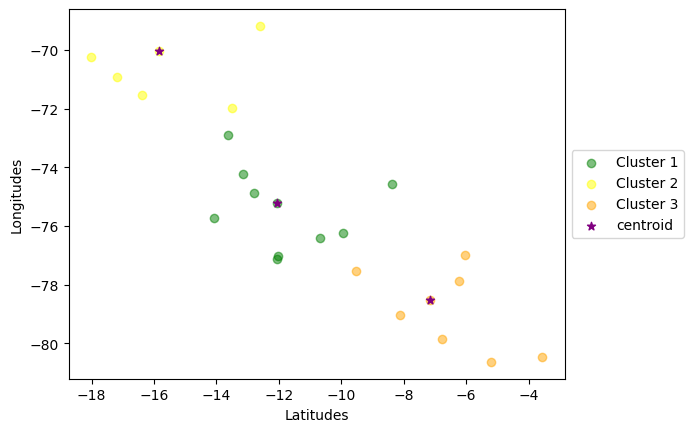

In [539]:

df1 = df_data_kmeans[df_data_kmeans.c==0]
df2 = df_data_kmeans[df_data_kmeans.c==1]
df3 = df_data_kmeans[df_data_kmeans.c==2]
alpha_value = 0.5

plt.scatter(df1['lat'],df1['long'],color='green',label='Cluster 1', alpha=alpha_value, )
plt.scatter(df2['lat'],df2['long'],color='yellow', label='Cluster 2',alpha=alpha_value)
plt.scatter(df3['lat'],df3['long'],color='orange',label='Cluster 3', alpha=alpha_value)


#plt.scatter(dfb['latitud'],dfb['longitud'],color='red', label='Zona 1', marker = '+' )
#plt.scatter(dfc['latitud'],dfc['longitud'],color='red', label='Zona 2', marker = '+' )
#plt.scatter(dfd['latitud'],dfd['longitud'],color='red', label='Zona 3', marker = '+' )
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Latitudes')
plt.ylabel('Longitudes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [540]:
# Labels for each point
labels = km.labels_
cluster_0 = []
cluster_1 = []
cluster_2 = []
# Print the cluster each data point belongs to

for i in range(len(df_lat_long['Capital'])):
    if labels[i] == 0:
        cluster_0.append(df_lat_long['Capital'][i])
    elif labels[i] == 1:
        cluster_1.append(df_lat_long['Capital'][i])
    else: 
        cluster_2.append(df_lat_long['Capital'][i])

    print(f"Data point {df_lat_long['Department'][i]} is in cluster {labels[i]}")

Data point Amazonas is in cluster 2
Data point Áncash is in cluster 2
Data point Apurímac is in cluster 0
Data point Arequipa is in cluster 1
Data point Ayacucho is in cluster 0
Data point Cajamarca is in cluster 2
Data point Callao is in cluster 0
Data point Cusco is in cluster 1
Data point Huancavelica is in cluster 0
Data point Huánuco is in cluster 0
Data point Ica is in cluster 0
Data point Junín is in cluster 0
Data point La Libertad is in cluster 2
Data point Lambayeque is in cluster 2
Data point Lima is in cluster 0
Data point Madre de Dios is in cluster 1
Data point Moquegua is in cluster 1
Data point Pasco is in cluster 0
Data point Piura is in cluster 2
Data point Puno is in cluster 1
Data point San Martín is in cluster 2
Data point Tacna is in cluster 1
Data point Tumbes is in cluster 2
Data point Ucayali is in cluster 0


In [541]:
# Ancash es mejor tenerlo en la zona centro, la distancia final del centro de lima es menor a los posibles centros del norte
# Entonces Huaraz al cluter 0 y se elimina del cluster 2
cluster_2.remove('Huaraz')
cluster_0.append('Huaraz')

In [542]:
cluster_0

['Abancay',
 'Ayacucho',
 'Callao',
 'Huancavelica',
 'Huánuco',
 'Ica',
 'Huancayo',
 'Lima',
 'Cerro de Pasco',
 'Pucallpa',
 'Huaraz']

# Centro

In [543]:
def make_df_statistics(df_horas_bus):
    department_counts = {}
    dis_horas_centro_min = 10
    dis_horas_centro_inter = 15
    dis_horas_centro_max = 30 
    lst =[]

    for row in range(len(df_horas_bus.index)):
        row_str = df_horas_bus.iloc[row]
        row_int = [int(str(item)) if isinstance(item, int) or (isinstance(item, str) and item.isdigit()) else item for item in row_str]
        row_int_filtered= row_int[1:]
        min_value = min(row_int_filtered)
        max_value = max(row_int_filtered)
        sortedvalue = sorted(row_int_filtered)
        second_min_value = sortedvalue[1]
        filter_column = [num for num in row_int_filtered if num < 15]
        median_value = median (row_int_filtered)
        median_invese = 100 - median_value
        count_selection = median(filter_column)
        department = row_int[0]
       
        count_greater_than_min = sum(1 for item in row_int_filtered if  item < dis_horas_centro_min)
        count_greater_than_inter = sum(1 for item in row_int_filtered if item <= dis_horas_centro_inter)
        count_greater_than_max = sum(1 for item in row_int_filtered if item > dis_horas_centro_inter)
        better_location = round((count_greater_than_inter*median_invese)/len(df_horas_bus.index),2)
        new_row = [min_value, second_min_value, max_value, median_value, count_greater_than_min,count_greater_than_inter,count_greater_than_max]
        department_counts[department] = [ median_value,min_value, max_value, count_greater_than_min,count_greater_than_inter,count_greater_than_max, second_min_value, count_selection, better_location]
        lst.append(new_row)
    sorted_departments = sorted(department_counts.items(), key=lambda item: item[0], reverse=True)
    department_data = []
    for department, counts in sorted_departments:
        department_data.append({
            'Department': department,
            'Min Value': counts[6],
            'Max Value': counts[2],
            'Median Value': counts[0],
            'Count < 15hrs': counts[4],
            'Count > 15hrs': counts[5],
            'Median <= 15hrs': counts[7],
            'Puntaje Mejor Locacion': counts[8]
        })
    df = pd.DataFrame(department_data)
    df_filter = df.sort_values(by = "Median <= 15hrs")
    return df_filter

In [544]:
tam_tabla = len(cluster_0)
cadena = ['Capital', cluster_0[0],cluster_0[1],cluster_0[3],cluster_0[4],cluster_0[5],cluster_0[6],cluster_0[7],cluster_0[8],cluster_0[9],cluster_0[10]]
df_info = df_horas_bus[cadena]
cluster_0_df = df_info[df_info['Capital'].isin(cluster_0)]
cluster_0_std = make_df_statistics(cluster_0_df)
cluster_0_std.to_csv('zona_sur.csv', index=False)
cluster_0_std

,Department,Min Value,Max Value,Median Value,Count < 15hrs,Count > 15hrs,Median <= 15hrs,Puntaje Mejor Locacion
1,Lima,4,15,7.0,10,0,6.5,93.00
5,Huancayo,3,14,7.0,10,0,7.0,93.00
6,Huancavelica,3,17,7.5,9,1,7.0,83.25
8,Ayacucho,5,19,8.5,8,2,7.5,73.20
3,Huánuco,3,20,8.0,9,1,8.0,82.80
7,Cerro de Pasco,3,18,9.0,9,1,8.0,81.90
2,Ica,4,20,9.5,9,1,9.0,81.45
0,Pucallpa,8,27,16.0,5,5,9.5,42.00
4,Huaraz,6,23,12.5,7,3,10.0,61.25
9,Abancay,8,27,14.5,6,4,11.0,51.30


In [545]:
len(cluster_2)

7

# Sur

In [546]:
tam_tabla = len(cluster_1)
cadena = ['Capital', cluster_1[0],cluster_1[1],cluster_1[3],cluster_1[4],cluster_1[5]]
df_info = df_horas_bus[cadena]
cluster_1_df = df_info[df_info['Capital'].isin(cluster_1)]
cluster_1_std = make_df_statistics(cluster_1_df)
cluster_1_std.to_csv('zona_centro.csv', index=False)
cluster_1_std

,Department,Min Value,Max Value,Median Value,Count < 15hrs,Count > 15hrs,Median <= 15hrs,Puntaje Mejor Locacion
3,Moquegua,2,11,3,5,0,3.0,80.83
0,Tacna,2,13,5,5,0,5.0,79.17
1,Puno,4,7,5,5,0,5.0,79.17
5,Arequipa,3,9,5,5,0,5.0,79.17
4,Cusco,7,13,9,5,0,9.0,75.83
2,Puerto Maldonado,10,16,13,4,1,11.5,58.00


In [547]:
cluster_1_df

,Capital,Arequipa,Cusco,Moquegua,Puno,Tacna
3,Arequipa,0,9,3,5,5
6,Cusco,9,0,11,7,13
14,Puerto Maldonado,13,9,14,10,16
15,Moquegua,3,11,0,4,2
18,Puno,5,7,4,0,6
20,Tacna,5,13,2,6,0


# Norte

In [548]:
tam_tabla = len(cluster_2)
cadena = ['Capital', cluster_2[0],cluster_2[1],cluster_2[3],cluster_2[4],cluster_2[5],cluster_2[6]]
df_info = df_horas_bus[cadena]
cluster_2_df = df_info[df_info['Capital'].isin(cluster_2)]
cluster_2_std = make_df_statistics(cluster_2_df)
cluster_2_std.to_csv('zona_norte.csv', index=False)
cluster_2_std

,Department,Min Value,Max Value,Median Value,Count < 15hrs,Count > 15hrs,Median <= 15hrs,Puntaje Mejor Locacion
0,Tumbes,5,20,10.5,4,2,6.5,51.14
4,Chiclayo,3,11,6.5,6,0,6.5,80.14
1,Trujillo,6,16,9.5,5,1,7.0,64.64
2,Piura,3,12,7.0,6,0,7.0,79.71
5,Chachapoyas,9,21,9.5,4,2,9.0,51.71
6,Cajamarca,5,14,9.0,6,0,9.0,78.00
3,Moyobamba,11,21,13.0,4,2,11.5,49.71


In [549]:
cluster_2_df

,Capital,Chachapoyas,Cajamarca,Chiclayo,Piura,Moyobamba,Tumbes
0,Chachapoyas,0,9,9,10,21,16
5,Cajamarca,9,0,5,9,14,13
11,Trujillo,12,6,4,7,16,12
12,Chiclayo,9,5,0,3,11,8
17,Piura,10,9,3,0,12,5
19,Moyobamba,21,14,11,12,0,20
21,Tumbes,16,13,8,5,20,0


Huancayo
Puno
Cajamarca

In [550]:
centroids = km.cluster_centers_
print("Centroids:", centroids)

Centroids: [[-12.0689  -75.2102 ]
 [-15.8422  -70.0333 ]
 [ -7.16111 -78.5097 ]]


## Tabla con los centros

In [551]:
centro_norte = 'Chiclayo'
centro_sur = 'Arequipa'
centro_centro = 'Lima'

In [552]:

capitals = df_horas_bus['Capital']
ciudad_centro_list =[]
ciudad_centro_vuelo = 'Lima'
tiempo_centro = []
departments = []
for capital in capitals:
    try:
        index = df_horas_bus.index[df_horas_bus['Capital'] == capital][0]
        department = df_horas_bus.iloc[index]['Departamento']
        if capital in cluster_0_df['Capital'].values:
            ciudad_centro = centro_centro
            tiempo = df_horas_bus.iloc[index]['Lima']
        if capital in cluster_1_df['Capital'].values:
            ciudad_centro = centro_sur
            tiempo = df_horas_bus.iloc[index][centro_sur]
        if capital in cluster_2_df['Capital'].values:
            ciudad_centro = centro_norte
            tiempo = df_horas_bus.iloc[index][centro_norte]
        ciudad_centro_list.append(ciudad_centro)
        tiempo_centro.append(tiempo)
        departments.append(department)
    except:
        print('error')
    
df['Tiempo tierra (horas)'] = tiempo_centro  
df['Capital'] = df_horas_bus['Capital']
df['Ciudad Asignada (Tierra)'] = ciudad_centro_list
df['Departamento'] = departments
df['Ciudad Asignada (Vuelo)'] = ciudad_centro_vuelo
df2 =df[['Departamento','Capital', 'Ciudad Asignada (Tierra)','Tiempo tierra (horas)', 'Ciudad Asignada (Vuelo)']]
df_vuelo = df_vuelo[['Capital','Tiempo vuelo (horas)']]
merged_df = pd.merge(df2, df_vuelo, on=['Capital'], how='inner')


In [553]:
new_row = pd.DataFrame([['Loreto','Iquitos', '-', '-','Lima','2']],columns=['Departamento', 'Capital', 'Ciudad Asignada (Tierra)', 'Tiempo tierra (horas)', 'Ciudad Asignada (Vuelo)', 'Tiempo vuelo (horas)' ])

df_final = pd.concat([merged_df, new_row], ignore_index=True)
df_final

,Departamento,Capital,Ciudad Asignada (Tierra),Tiempo tierra (horas),Ciudad Asignada (Vuelo),Tiempo vuelo (horas)
0,Amazonas,Chachapoyas,Chiclayo,9,Lima,1.5
1,Áncash,Huaraz,Lima,6,Lima,1.0
2,Apurímac,Abancay,Lima,15,Lima,1.25
3,Arequipa,Arequipa,Arequipa,0,Lima,1.25
4,Ayacucho,Ayacucho,Lima,9,Lima,1.0
5,Cajamarca,Cajamarca,Chiclayo,5,Lima,1.5
6,Cusco,Cusco,Arequipa,9,Lima,1.25
7,Huancavelica,Huancavelica,Lima,7,Lima,1.0
8,Huánuco,Huánuco,Lima,8,Lima,1.0
9,Ica,Ica,Lima,4,Lima,0.75
